In [0]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
import seaborn as sns
from keras import applications
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Flatten, Input,MaxPool2D,Dropout,AveragePooling2D,GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
from keras import optimizers
from keras.applications.vgg16 import preprocess_input
from keras.utils import np_utils
from keras.applications import vgg16 as vgg

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [207]:
count = [0] * 10
for i in range(10000):
    count[y_test[i][0]]=count[y_test[i][0]]+1
print(count)

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [0]:
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    fig,ax = plt.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='red',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='red',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    plt.show()

In [275]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
input_tensor = Input(shape=(32, 32, 3))
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))


# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

# Add classification layers on top of it
x = Flatten()(last)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(10, activation='softmax')(x)
model = Model(base_model.input, pred)


for layer in base_model.layers:
     layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_94 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [276]:
history2 = model.fit(x_train,to_categorical(y_train),batch_size=1000,validation_split=0.2,shuffle=True,epochs=20)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 27s 664us/step - loss: 0.1928 - acc: 0.9301 - val_loss: 0.1190 - val_acc: 0.9539
Epoch 2/20
40000/40000 [==============================] - 8s 208us/step - loss: 0.1190 - acc: 0.9547 - val_loss: 0.1038 - val_acc: 0.9602
Epoch 3/20
40000/40000 [==============================] - 8s 208us/step - loss: 0.0982 - acc: 0.9625 - val_loss: 0.0981 - val_acc: 0.9622
Epoch 4/20
40000/40000 [==============================] - 8s 211us/step - loss: 0.0833 - acc: 0.9680 - val_loss: 0.0955 - val_acc: 0.9636
Epoch 5/20
40000/40000 [==============================] - 8s 209us/step - loss: 0.0712 - acc: 0.9727 - val_loss: 0.0951 - val_acc: 0.9637
Epoch 6/20
40000/40000 [==============================] - 8s 208us/step - loss: 0.0630 - acc: 0.9762 - val_loss: 0.0950 - val_acc: 0.9654
Epoch 7/20
40000/40000 [==============================] - 8s 208us/step - loss: 0.0546 - acc: 0.9792 - val_loss: 0.0981 -

10000/10000 [==============================] - 2s 245us/step
The Training error
0.01335500180721283
The Validation error
0.03548001050949101
The Test error
0.036940005421638444


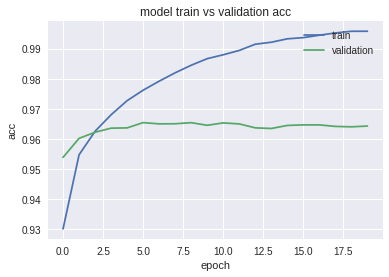

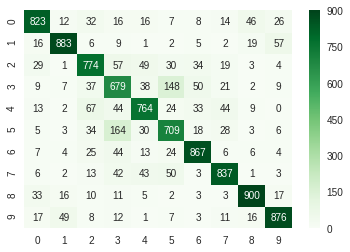

ValueError: ignored

In [277]:
scores = model.evaluate(x_test, to_categorical(y_test), batch_size=100, verbose=1)
print("The Training error")
print(1-history2.history['acc'][9])
print("The Validation error")
print(1-history2.history['val_acc'][9])
print("The Test error")
print(1-(scores[1]))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
preds2 = model.predict(np.reshape(x_test,(10000,32,32,3)))
pred_cat2 = np.argmax(preds2,axis=1)
sns.heatmap(confusion_matrix(y_test,pred_cat2),cmap='Greens',annot=True, fmt='d')
plot_multiple_imgs(x_test,y_test,15,15,(20,15),pred_cat2,skip=500)

In [254]:
vgg16_feature_np = model.predict(x_train)
print (vgg16_feature_np.shape)
vg16_x_test = model.predict(x_test)
vg16_x_test.shape

(50000, 10)


(10000, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


model error on test set is: 0.18879999999999997%



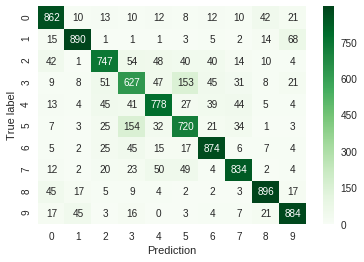

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# keep in mind we have to normalize our inputs!


stds = StandardScaler()
svc = SVC(max_iter=1000)
svc.fit(stds.fit_transform(vgg16_feature_np),y_train[:50000])
preds = svc.predict(stds.transform(vg16_x_test))

pred_cat2 = preds
print('model error on test set is: {}%'.format(1-accuracy_score(y_test,pred_cat2)))
sns.heatmap(confusion_matrix(y_test,pred_cat2),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
print()
#plot_multiple_imgs(x_test,y_test,10,10,(12,12),pred_cat2,skip=500)

[[672  19  41  13  11   9  21  35 129  50]
 [ 33 546   7  24   5  18  29  11  36 291]
 [ 95  18 366  86 100  78 161  72  15   9]
 [ 24  35  74 324  56 183 161  59  22  62]
 [ 32   8  94  43 384  54 164 181  21  19]
 [ 32  17  65 251  31 375  90 101   9  29]
 [ 15  11  57  71  38  35 735  13   9  16]
 [ 23  14  36  52  71  52  25 653  17  57]
 [112  62  15  12   8   9  11  16 694  61]
 [ 40 100   5  19  12  12   9  25  50 728]]

model accuracy on test set is: 54.769999999999996%



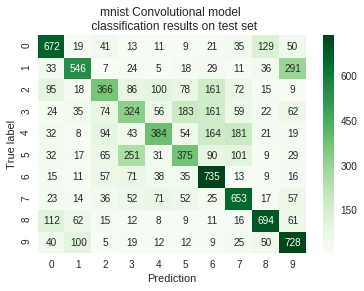

In [0]:
pred_cat = preds
print(confusion_matrix(y_test,pred_cat))
print()
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('mnist Convolutional model \n classification results on test set')
print()

In [0]:
print("The Training error")
print(1-history2.history['acc'][69])
print("The Validation error")
1-history2.history['val_acc'][69]

The Training error
0.036084212754902034
The Validation error


0.3939999997615814

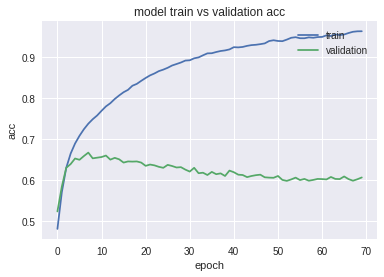

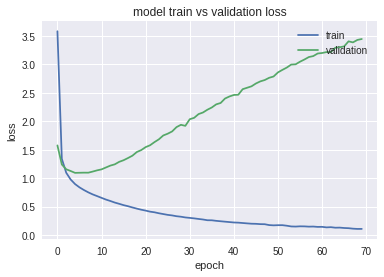

[[499  30 146  51  76  13  22  22 116  25]
 [108 269  40 101  63  32  47  28 205 107]
 [147  17 313 106 171  71  73  27  57  18]
 [126  16 109 267 124  85 106  49  86  32]
 [ 63  10 171  92 461  37  53  57  40  16]
 [ 71  12 107 192 100 291  73  66  64  24]
 [ 70  21 123  91 241  22 362   9  51  10]
 [ 99   7  74  77 264  68  30 253  98  30]
 [229  44  67  88  77  35  28  43 349  40]
 [118 101  36  88  68  36  24  41 211 277]]

model accuracy on test set is: 33.410000000000004%


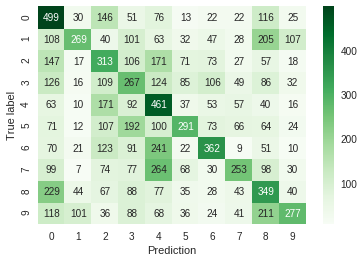

In [0]:
#print(history2.history)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
preds2 = custom_model.predict(np.reshape(x_test,(10000,32,32,3)))
pred_cat2 = np.argmax(preds2,axis=1)
print(confusion_matrix(y_test,pred_cat2))
print()
sns.heatmap(confusion_matrix(y_test,pred_cat2),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat2)*100))


# **Predicting images from me and friends**

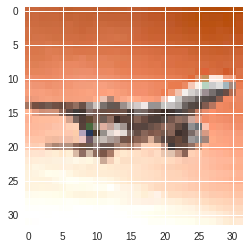

Should be: AirPlane
My Prediction: AirPlane


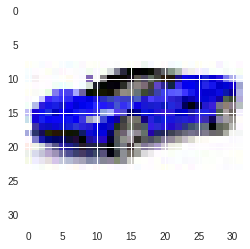

Should be: Car
My Prediction: Car


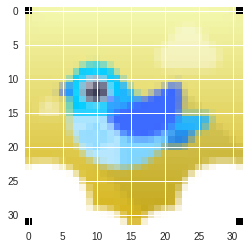

Should be: Bird
My Prediction: Bird


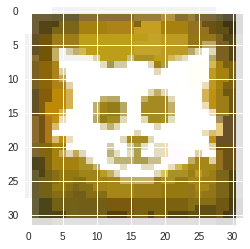

Should be: Cat
My Prediction: Car


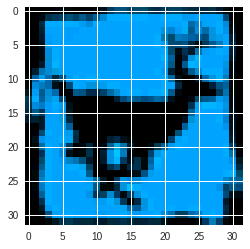

Should be: Deer
My Prediction: AirPlane


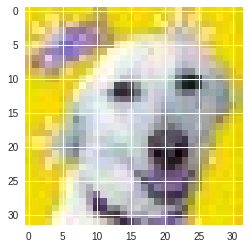

Should be: Dog
My Prediction: Dog


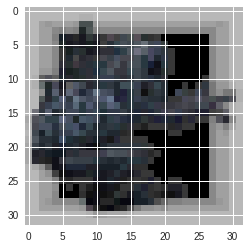

Should be: Frog
My Prediction: Truck


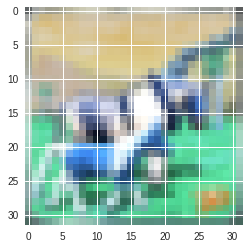

Should be: Horse
My Prediction: Horse


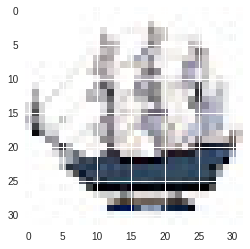

Should be: Boat
My Prediction: Boat


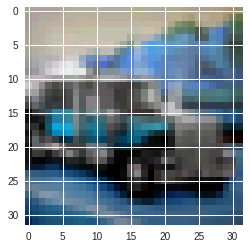

Should be: Truck
My Prediction: Truck


In [370]:
import numpy as np
import urllib
import cv2
import urllib.request
from matplotlib import pyplot as plt

class_num_to_name = ["AirPlane","Car","Bird","Cat","Deer"
                    ,"Dog","Frog","Horse","Boat","Truck"]
urls = [
    "https://image.ibb.co/fzrzsA/plane.png", #plane
    "https://lh3.googleusercontent.com/proxy/imRz6802PLiR91557T07ueh1T7vlfusKFFd1B_46eEkIvm4cqfmy52O_7iYmkxlK8YzQ"+
    "2NrlkKuLiAH_sYQfgdvJErAWNj6YlMRCKF48DQ9K4alEPe2t_VUzuJyKnyoPdngVuSmumbr_am8x5fn0nKR6ILUuAbim2AeQjyjA_NrckswqO"+
    "uX1ajBj0gvYbB42ModkFct45w6jYYAuGdiv=s32-pd-e365-pc0xffffff",#car
    "https://dl1.cbsistatic.com/i/r/2017/02/02/3b010864-d877-419e-9845-7655d166f5ca/thumbnail/32x32/f58066d868f44481867a104c9b1d8f93/fmimg5244066407115727858.png", #bird
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9tckP_radYEDMlZzFA2pNOE35mLzCKkiCTXtPMU2kE6SIUNjUuQ", #cat
    "https://dl1.cbsistatic.com/i/r/2017/08/27/081cbbc4-a5fc-47b0-aaac-ff8e25d6fef1/thumbnail/32x32/9de3fea95995615c61f06dd819b53158/iconimg110936.png", #deer
    "https://0.gravatar.com/avatar/3999c3c710744589c9f25573aae51b3f?s=32&d=https%3A%2F%2Fs0.wp.com%2Fi%2Fmu.gif",#dog
     "https://image.ibb.co/b1zikV/frog.png", #frog
    "https://dl1.cbsistatic.com/i/r/2017/02/01/976c6cd4-b927-4315-b1f1-285e2d33c96d/thumbnail/32x32/32e31a53f950d4d90335d666d66a9bc6/fmimg4473345280930320724.png", #horse
    "https://lh3.googleusercontent.com/proxy/E1YLCg0fMV9p0geL1Gj7LX6q4lXZq71ipnkGIyHOdb522o1CpFIZ-V50Sp76p8faGaJJLLFB9Kdkw_S7HtqUdtaWkVP1hUEgobd2KXgIk70y0-gxvU_nHP7BAuSFq29iQOXT4qhiivGHPYjsHvkSuKFyDobSt8cxfvBjaLtX5HFhYX-0A3RicgEkzoAEaZhM48jcpNorr2l6ofpKOa4=s32-pd-e365-pc0xffffff", #boat
    "https://dl1.cbsistatic.com/i/r/2017/02/01/966d2edb-d546-449f-bd11-baab9a7e7820/thumbnail/32x32/0e7721cfc805dd1cc0db21867e7a55f0/fmimg6404612672705374702.png", #truck
]

true_label = [0,1,2,3,4,5,6,7,8,9]

images_from_friends = []
for i in range (len(urls)):
  with urllib.request.urlopen(urls[i]) as url:
      s = url.read()
  #I'm guessing this would output the html source code?
  image = np.asarray(bytearray(s), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  images_from_friends.append(image)
images_from_friends = np.array(images_from_friends)
  
preds2 = model.predict(images_from_friends)
pred_cat2 = np.argmax(preds2,axis=1)
for i in range (len(true_label)):
   plt.imshow(images_from_friends[i], interpolation='nearest')
   plt.show()
   print("Should be: "+class_num_to_name[true_label[i]])
   print("My Prediction: "+class_num_to_name[pred_cat2[i]])
   
   




#plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    